In [1]:
# Installing the libraries
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install sklearn

In [2]:
## Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import requests as re
import pandas as pd

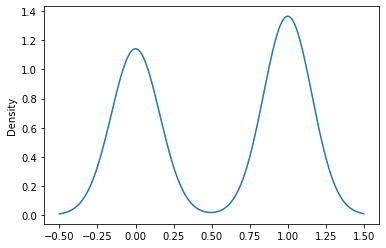

In [3]:
dataset = pd.read_csv("heart.csv")
dataset["target"].plot.kde()

Text(0.5, 1.0, 'Age distribution')

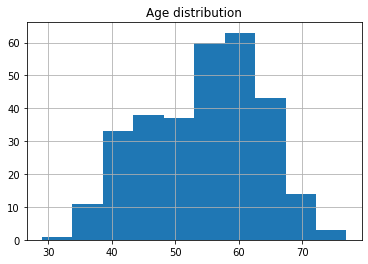

In [4]:
## Looking at the Age distribution
dataset["age"].hist()
plt.title("Age distribution")

### Information from the Age distribution
<b>Looking at the age distribution we can understand that the model would perform relatively well for age groups between 40 & 65. This is because we have more data for those age groups and the model we are using is a supervised machine learning model which would perform well if there is more data.</b>

In [5]:
#Features
age = np.array(dataset["age"]).reshape(-1,1)
sex = np.array(dataset["sex"]).reshape(-1,1)
cp = np.array(dataset["cp"]).reshape(-1,1)
trestbps = np.array(dataset["trestbps"]).reshape(-1,1)
thalach = np.array(dataset["thalach"]).reshape(-1,1)
trestecg =  np.array(dataset["restecg"]).reshape(-1,1)

In [6]:
#Forming the feature vector
featurevector = np.concatenate((age,sex,cp,trestbps,thalach,trestecg),axis=1)

In [7]:
print("Shape of the Feature Vector is : ",featurevector.shape)

Shape of the Feature Vector is :  (303, 6)


In [8]:
#Target vector
target = np.array(dataset["chol"]).reshape(-1,1)
print("Shape of the Target Vector is :",target.shape)

Shape of the Target Vector is : (303, 1)


## Decision Tree Model

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
classifier = DecisionTreeRegressor(min_samples_leaf = 1, min_weight_fraction_leaf = 0.002, random_state = 42 , min_impurity_decrease=  0.0001 , criterion = 'mse')

In [20]:
classifier.fit(featurevector , target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0001,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.002,
                      presort=False, random_state=42, splitter='best')

## Ground truth vs Model Prediction

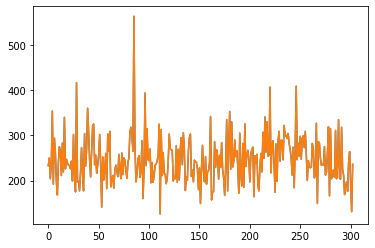

In [21]:
plt.plot(target)
plt.plot(classifier.predict(featurevector))

In [22]:
# $$$ Model Validation $$$ ###
age = int(input("Enter age : "))
sex = int(input("Enter sex : 0 for female 1 for male : "))
cp = int(input("Enter 0 if no chest pain 2 for max pain : "))
trestbps = float(input("Heart rate : "))
thalach = int(input("Enter 1 if sugar is 120 or less else 0 else : "))
tecg = int(input("ECG Status : "))
age = np.array(age).reshape(1,-1)
sex = np.array(sex).reshape(1,-1)
cp = np.array(cp).reshape(1,-1)
trestbps = np.array(trestbps).reshape(1,-1)
thalach = np.array(thalach).reshape(1,-1)
ecg  =np.array(tecg).reshape(1,-1)
fv = np.concatenate((age , sex , cp , trestbps , thalach , ecg), axis = 1)
inf = classifier.predict(fv)
print(inf)

Enter age :  41
Enter sex : 0 for female 1 for male :  0
Enter 0 if no chest pain 2 for max pain :  1
Heart rate :  140
Enter 1 if sugar is 120 or less else 0 else :  1
ECG Status :  1


[213.]


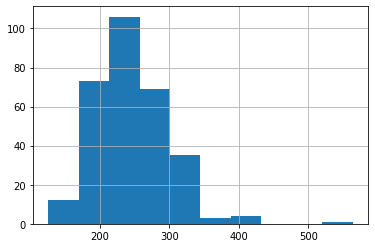

In [17]:
plt.hist(classifier.predict(featurevector))
plt.grid(True)

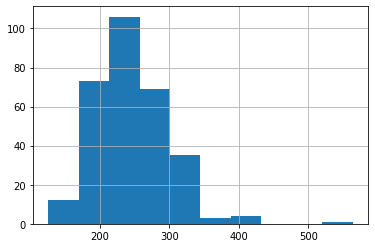

In [18]:
plt.hist(target)
plt.grid(True)